In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from individual import print_genotype
import ast

# set figure dimensions
sns.set(rc={'figure.figsize':(35,4)})


Using TensorFlow backend.


In [2]:
df = pd.read_table("10.tsv")

In [3]:
df.columns = ['generation', 'accuracy', 'training_time', 'test_time', 'genotype', 'fitness', 'selection']
df = df.replace([np.nan, -np.nan], 0)
df["training_time"] = pd.to_numeric(df["training_time"])

df.tail(5)

,generation,accuracy,training_time,test_time,genotype,fitness,selection
4404,439,0.9252,89.037182,1.035147,"{'params': {'mutation': 0.1, 'optimiser': 'Ada...",0.9252,weighted
4405,439,0.9261,133.059021,1.332952,"{'params': {'mutation': 0.1, 'optimiser': 'Ada...",0.9261,weighted
4406,439,0.9277,129.690782,1.215631,"{'params': {'mutation': 0.1, 'optimiser': 'Ada...",0.9277,weighted
4407,439,0.9299,157.789230,1.501148,"{'params': {'mutation': 0.2, 'optimiser': 'Ada...",0.9299,weighted
4408,439,0.9320,157.307267,1.474150,"{'params': {'mutation': 0.1, 'optimiser': 'Ada...",0.9320,weighted


In [4]:
# what does the best genotype look like??
a = np.unique(df['accuracy'])

In [5]:
# what does the third best genotype look like??
best_genotype = df.loc[df['accuracy'] == a[-3], 'genotype'].iloc[0]
best_genotype = ast.literal_eval(best_genotype)
print_genotype(best_genotype)
print('accuracy: ', a[-3])

Network: 13 layers
conv: 3x3x16, s=1, p=same
conv: 4x4x14, s=1, p=same
conv: 5x5x12, s=1, p=same
pool: 4x4, s=3, p=valid
batch: standard
batch: standard
batch: standard
batch: standard
batch: standard
batch: standard
batch: standard
full: 539
full: 213
9 epochs
[64, 32, 64, 256, 8192, 8192, 2048, 4096, 4096]
mutation:  0.1
learning_rate:  0.0016453796056356432
optimiser:  Adam
indel:  0.20000000000000004
accuracy:  0.9367


In [6]:
# what does the second best genotype look like??
best_genotype = df.loc[df['accuracy'] == a[-2], 'genotype'].iloc[0]
best_genotype = ast.literal_eval(best_genotype)
print_genotype(best_genotype)
print('accuracy: ', a[-2])

Network: 13 layers
conv: 3x3x16, s=1, p=same
conv: 4x4x14, s=1, p=same
conv: 5x5x12, s=1, p=same
pool: 4x4, s=3, p=valid
batch: standard
batch: standard
batch: standard
batch: standard
batch: standard
batch: standard
batch: standard
full: 539
full: 213
9 epochs
[64, 64, 64, 256, 8192, 8192, 2048, 4096, 8192]
mutation:  0.1
learning_rate:  0.0016453796056356432
optimiser:  Adam
indel:  0.20000000000000004
accuracy:  0.9369


In [7]:
# what does the best genotype look like??
best_genotype = df.loc[df['accuracy'] == a[-1], 'genotype'].iloc[0]
best_genotype = ast.literal_eval(best_genotype)
print_genotype(best_genotype)
print('accuracy: ', a[-1])

Network: 13 layers
conv: 3x3x16, s=1, p=same
conv: 4x4x14, s=1, p=same
conv: 5x5x12, s=1, p=same
pool: 4x4, s=3, p=valid
batch: standard
batch: standard
batch: standard
batch: standard
batch: standard
batch: standard
batch: standard
full: 539
full: 213
9 epochs
[64, 64, 64, 256, 8192, 8192, 2048, 4096, 8192]
mutation:  0.1
learning_rate:  0.0016453796056356432
optimiser:  Adam
indel:  0.20000000000000004
accuracy:  0.9383


In [8]:
# what does the best genotype look like??
latest = df.iloc[-1]
print_genotype(ast.literal_eval(latest['genotype']))
print("accuracy: ", latest['accuracy'])

Network: 13 layers
conv: 4x4x17, s=1, p=same
conv: 4x4x14, s=1, p=valid
conv: 1x1x12, s=1, p=valid
pool: 4x4, s=1, p=same
batch: standard
batch: standard
batch: standard
conv: 8x8x26, s=1, p=same
batch: standard
batch: standard
conv: 4x4x15, s=2, p=same
batch: standard
batch: standard
11 epochs
[128, 64, 32, 128, 4096, 4096, 8192, 8192, 1024, 8192, 8192]
mutation:  0.1
learning_rate:  0.0017055443237852194
optimiser:  Adam
indel:  0.2
accuracy:  0.932


[(0.0, 1.0)]

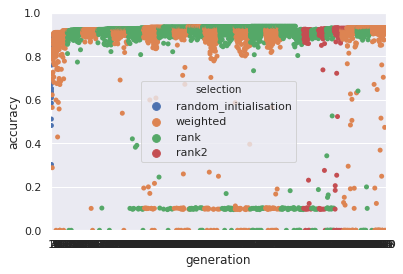

In [9]:
p1 = sns.stripplot(y='accuracy',x='generation', data=df, hue='selection')
p1.set(ylim=(0.0, 1.0))

[(0.88, 0.94)]

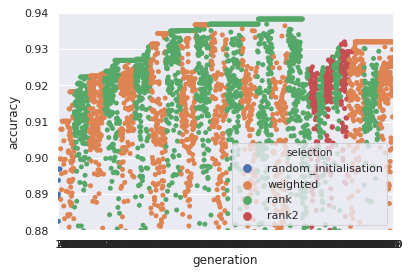

In [10]:
p1 = sns.stripplot(y='accuracy',x='generation',data=df, hue='selection')
p1.set(ylim=(0.88, 0.94))

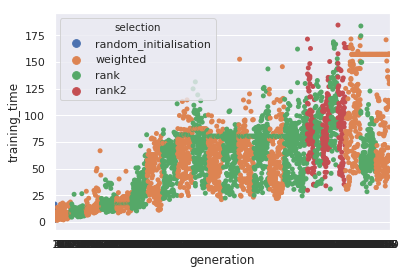

In [11]:
sns.stripplot(y='training_time',x='generation',data=df, hue='selection')

[(0.85, 0.94)]

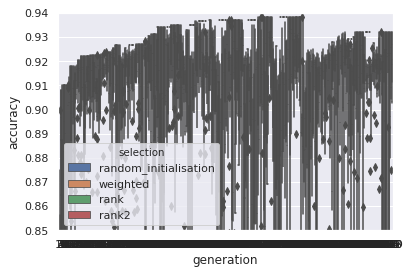

In [12]:
p1 = sns.boxplot(y='accuracy',x='generation',data=df, hue='selection')
p1.set(ylim=(0.85, 0.94))

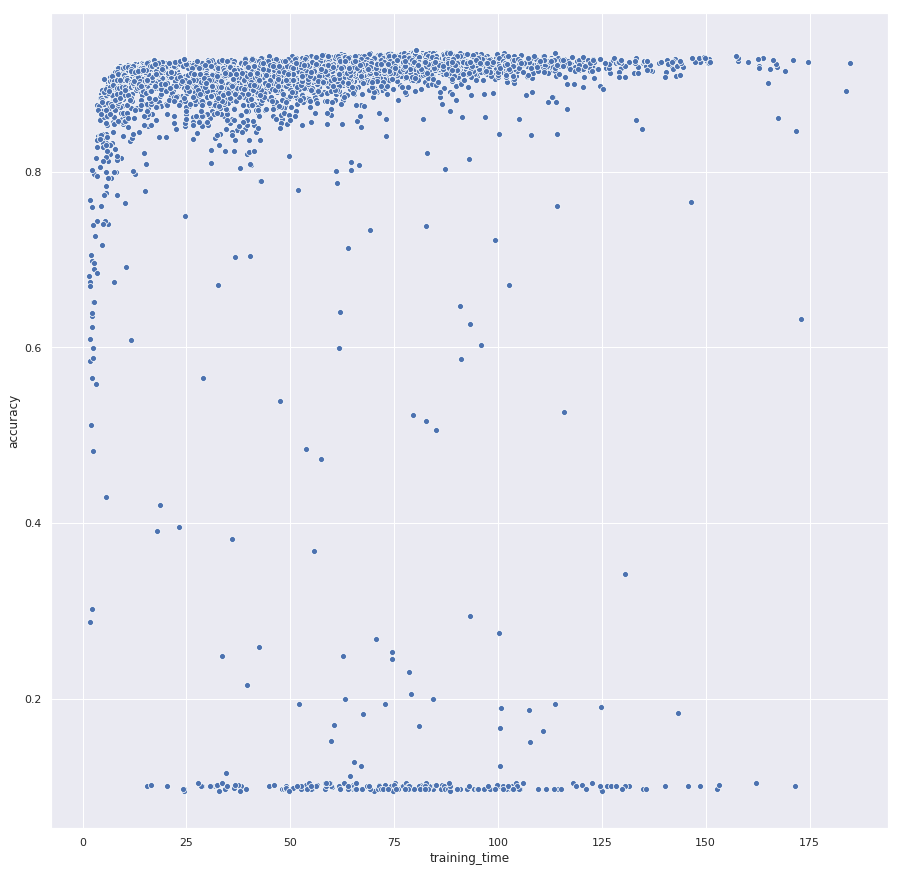

In [13]:
sns.set(rc={'figure.figsize':(15,15)})

p2 = sns.scatterplot(y='accuracy',x='training_time',data=df)

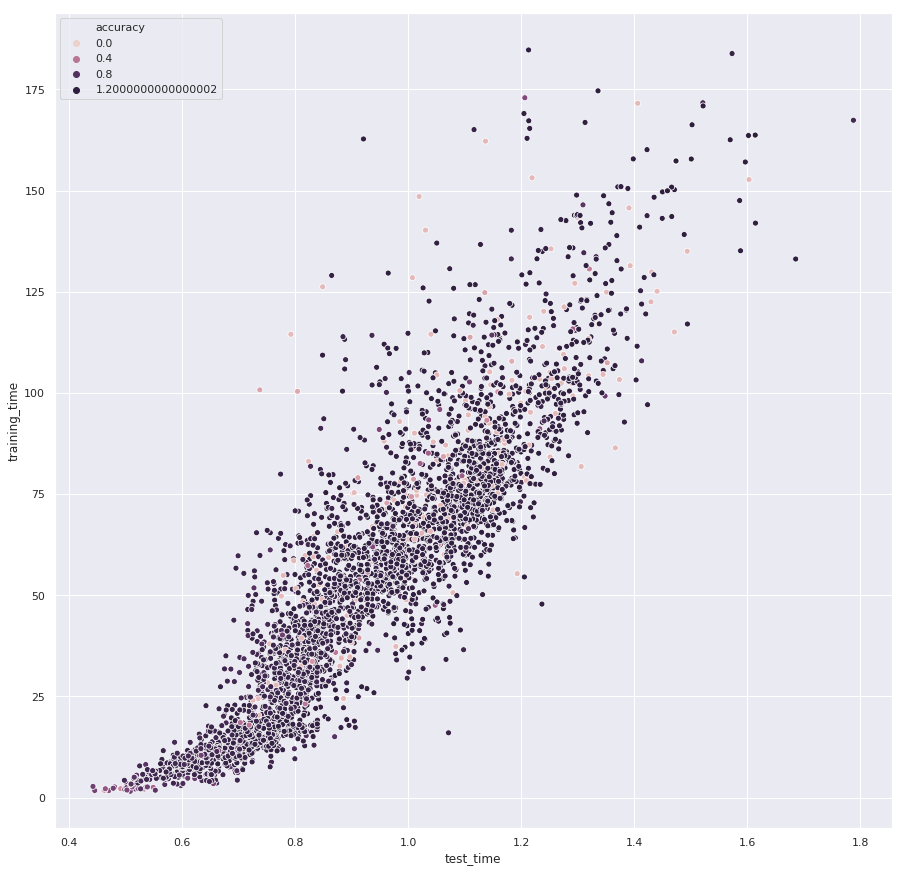

In [14]:
sns.scatterplot(y='training_time',x='test_time',data=df, hue='accuracy')


[(0.8, 0.94)]

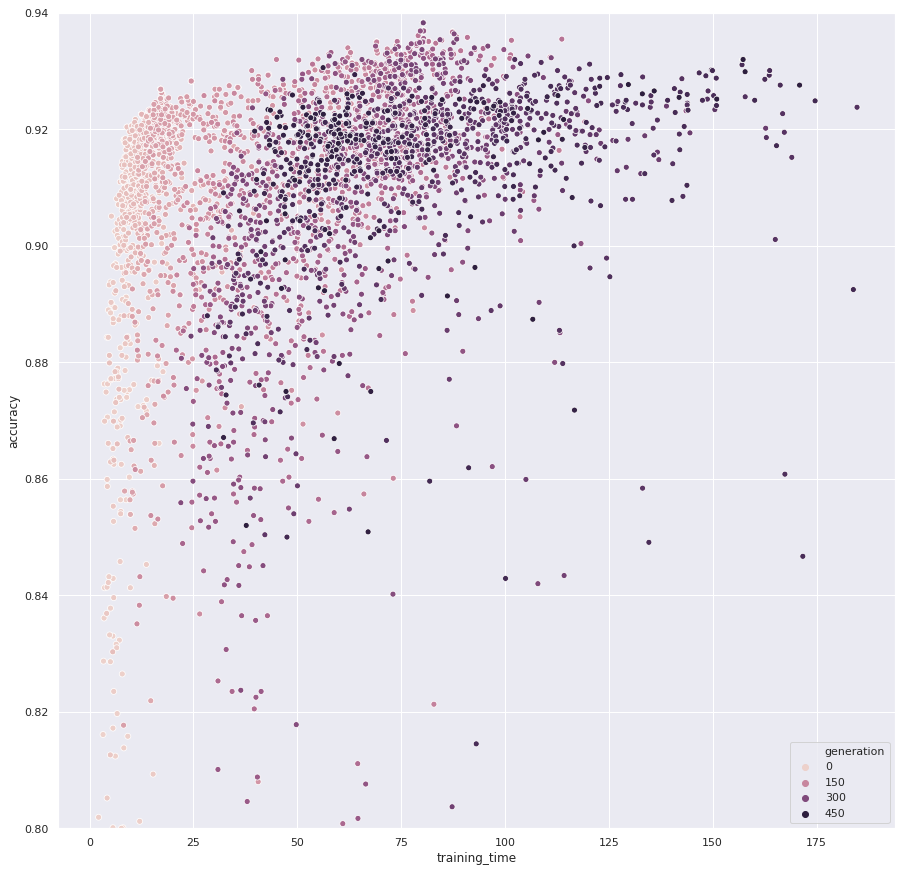

In [15]:
p1 = sns.scatterplot(y='accuracy',x='training_time',data=df,hue='generation')
p1.set(ylim=(0.80, 0.94))